pytorch官网： https://pytorch.org/docs/stable

PyTorch常用代码段合集：https://mp.weixin.qq.com/s/2bpT93KrqwWfE-Ob0iC8xA

## 1 张量（Tensor）处理


### 1.1 TORCH.GATHER理解

> torch.gather(input, dim, index, *, sparse_grad=False, out=None) → Tensor



具体是如何得到的呢？
https://blog.csdn.net/edogawachia/article/details/80515038

<img src="https://tva1.sinaimg.cn/large/008vxvgGgy1h80hwytl2kj319u0gugnh.jpg" alt="image-20221111002703552" style="zoom:50%;" />

In [6]:
"""
关键是“指定dim=1，也就是横向，dim=0，也就是纵向”
"""
import torch
t = torch.tensor([[1, 2], [3, 4]])
print(t)
torch.gather(t, 1, torch.tensor([[0, 0], [1, 0]]))

tensor([[1, 2],
        [3, 4]])


tensor([[1, 1],
        [4, 3]])

## 2.模型操作

In [21]:
"""
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
"""

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*3, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


###  2.1 模型参数可视化
- https://github.com/TylerYep/torchinfo

- https://github.com/sksq96/pytorch-summary

- https://github.com/szagoruyko/pytorchviz

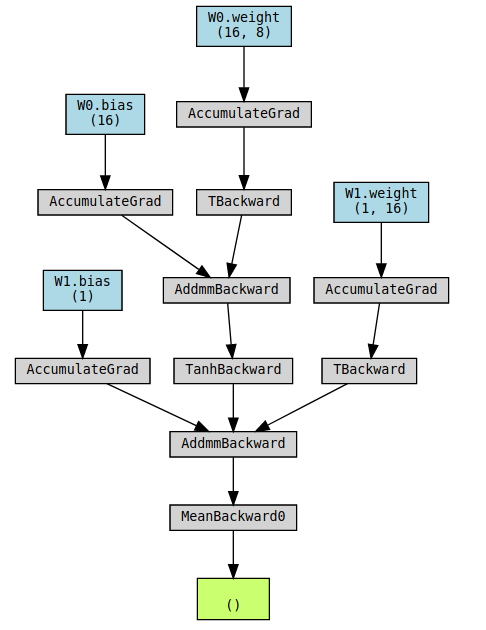


In [24]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=9, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=2, bias=True)
  )
)


### summary

In [25]:
from torchinfo import summary
batch_size = 16
>>> summary(model, input_size=(batch_size, 1, 3, 3))

==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
NeuralNetwork                            [16, 2]                   --
├─Flatten: 1-1                           [16, 9]                   --
├─Sequential: 1-2                        [16, 2]                   --
│    └─Linear: 2-1                       [16, 5]                   50
│    └─ReLU: 2-2                         [16, 5]                   --
│    └─Linear: 2-3                       [16, 5]                   30
│    └─ReLU: 2-4                         [16, 5]                   --
│    └─Linear: 2-5                       [16, 2]                   12
==========================================================================================
Total params: 92
Trainable params: 92
Non-trainable params: 0
Total mult-adds (M): 0.00
==========================================================================================
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
==========================================================================================


SyntaxError: invalid syntax (<ipython-input-25-f8f22457a02e>, line 3)

### torchviz


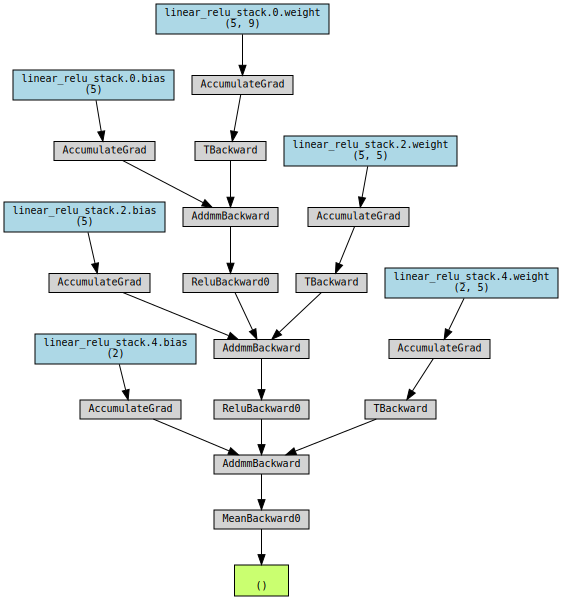

In [28]:
from torchviz import make_dot
x = torch.randn(1, 3,3)

y = model(x)

make_dot(y.mean(), params=dict(model.named_parameters()))

### state_dict & named_parameters

In [56]:
"""
查看网络中的参数
可以通过model.state_dict()或者model.named_parameters()函数查看现在的全部可训练参数（包括通过继承得到的父类中的参数）
"""
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([5, 9]) | Values : tensor([[-0.1505,  0.1393,  0.3088, -0.2265, -0.2220, -0.2034, -0.1988, -0.0462,
          0.0555],
        [ 0.0732, -0.0963,  0.3172, -0.1632,  0.3104,  0.1515,  0.0609,  0.1867,
         -0.1924]], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([5]) | Values : tensor([-0.1711,  0.2423], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([5, 5]) | Values : tensor([[ 0.2930,  0.3321, -0.3406,  0.0164, -0.0445],
        [ 0.3979,  0.0360,  0.2487, -0.1093, -0.0471]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([5]) | Values : tensor([-0.3723,  0.2502], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([2, 5]) | Values : tensor([[ 0.3693, -0.3486,  0.3749, -0.2197, -0.2829],
        [ 0.3338, -0.2506,  0.0766,  0.2341, -0.0797]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack

In [33]:
model.state_dict()

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[-0.1505,  0.1393,  0.3088, -0.2265, -0.2220, -0.2034, -0.1988, -0.0462,
                        0.0555],
                      [ 0.0732, -0.0963,  0.3172, -0.1632,  0.3104,  0.1515,  0.0609,  0.1867,
                       -0.1924],
                      [ 0.2805, -0.0878, -0.0821,  0.2170, -0.0332,  0.2695,  0.1557,  0.2022,
                        0.2534],
                      [-0.0254,  0.1364,  0.2617,  0.0699,  0.3104,  0.0657,  0.0287, -0.1788,
                        0.2338],
                      [-0.0844, -0.2488, -0.3120,  0.3209, -0.1398, -0.1047,  0.2917, -0.2950,
                       -0.2249]])),
             ('linear_relu_stack.0.bias',
              tensor([-0.1711,  0.2423,  0.1371, -0.0813,  0.1693])),
             ('linear_relu_stack.2.weight',
              tensor([[ 0.2930,  0.3321, -0.3406,  0.0164, -0.0445],
                      [ 0.3979,  0.0360,  0.2487, -0.1093, -0.0471],
                   

In [69]:
torch.unsqueeze(F.pad(torch.ones(1,1), [1,1,1,1]), 0).shape
torch.unsqueeze(torch.zeros(3, 3), 0).shape

torch.Size([1, 3, 3])